# 10.4 Bidirectional Recurrent Neural 

There are many other sequence learning tasks contexts where it is perfectly fine to condition the prediction at every time step on both the leftward and the rightward context. Consider, for example, part of speech detection. Why shouldn’t we take the context in both directions into account when assessing the part of speech associated with a given word?

Note that depending on what comes after the blank, the likely value of the missing token changes dramatically:
 - I am ___.
 - I am ___ hungry.
 - I am ___ hungry, and I can eat half a pig.

 Fortunately, a simple technique transforms any unidirectional RNN into a bidirectional RNN (Schuster and Paliwal, 1997). We simply implement two unidirectional RNN layers chained together in opposite directions and acting on the same input.

 Thus, the output is calculated as the result of FC layer with concatenated hidden vectors.

 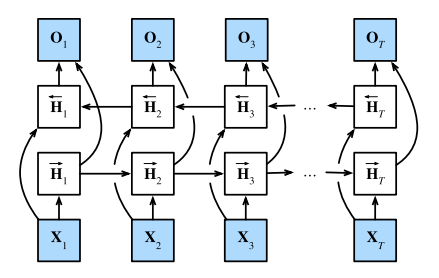

In [2]:
import torch
from torch import nn
from d2l import torch as d2l

## 10.4.1 Implementation from Srcath

In [3]:
class BiRNNScratch(d2l.Module):
    def __init__(self, num_inputs, num_hiddens, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.f_rnn = d2l.RNNScratch(num_inputs, num_hiddens, sigma)
        self.b_rnn = d2l.RNNScratch(num_inputs, num_hiddens, sigma)
        self.num_hiddens *= 2 # The output dimension will be doubled

In [4]:
@d2l.add_to_class(BiRNNScratch)
def forward(self, inputs, Hs=None):
    f_H, b_H = Hs if Hs is not None else (None, None)
    f_outputs, f_H = self.f_rnn(inputs, f_H)
    b_outputs, b_H = self.b_rnn(reversed(inputs), b_H)
    outputs = [torch.cat((f, b), -1) for f, b in zip(f_outputs, reversed(b_outputs))]
    return outputs, (f_H, b_H)

## 10.4.2 Concise Implementation

In [5]:
class BiGRU(d2l.RNN):
    def __init__(self, num_inputs, num_hiddens):
        d2l.Module.__init__(self)
        self.save_hyperparameters()
        self.rnn = nn.GRU(num_inputs, num_hiddens, bidirectional=True)
        self.num_hiddens *= 2